## test for facebook/prophet
不太行。。

In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
path = "/Users/zch/Desktop/internship/data/chemClean32.xlsx"
df = pd.read_excel(path)

In [4]:
code = "000731"
company = df[df["code"].str.contains(code)]

In [5]:
company

,code,name,2000-12,2001-03,2001-06,2001-09,2001-12,2002-03,2002-06,2002-09,2002-12,2003-03,2003-06,2003-09,2003-12,2004-03,2004-06,2004-09,2004-12,2005-03,2005-06,2005-09,2005-12,2006-03,2006-06,2006-09,2006-12,2007-03,2007-06,2007-09,2007-12,2008-03,2008-06,2008-09,2008-12,2009-03,2009-06,2009-09,2009-12,2010-03,...,2010-12,2011-03,2011-06,2011-09,2011-12,2012-03,2012-06,2012-09,2012-12,2013-03,2013-06,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12,2019-03,2019-06,2019-09,2019-12,2020-03,2020-06,2020-09
17,000731.SZ,四川美丰,NaN,NaN,NaN,NaN,NaN,1.348,4.1689,2.1162,3.0572,2.5124,4.1122,2.8161,3.8112,3.1987,6.0826,3.474,6.80521,5.1551,6.80521,5.5669,3.5712,3.6705,6.80521,4.2613,4.076,5.4476,5.0201,6.80521,6.7843,4.813,2.9442,4.7863,0.6684,2.8973,5.1467,0.901,-0.5609,1.5605,...,1.1673,0.8205,4.6087,4.6849,4.1883,1.3452,4.2194,4.9162,3.2585,0.8685,1.461,3.3801,0.2928,0.058,-1.72204,-1.72204,-1.01,0.6562,1.0444,0.334,0.025,-0.174,-1.4977,-1.72204,-1.72204,1.3154,2.0852,1.9481,0.7693,1.8008,2.7899,3.285,0.2349,1.0369,1.222,1.5294,-0.711,0.2507,1.1917,1.0467


In [10]:
ds = pd.to_datetime(df.columns.values[2:]).date

In [13]:
testDf = pd.DataFrame({"ds":ds, "y":company.iloc[0, 2:]})

In [14]:
testDf

,ds,y
2000-12,2000-12-01,NaN
2001-03,2001-03-01,NaN
2001-06,2001-06-01,NaN
2001-09,2001-09-01,NaN
2001-12,2001-12-01,NaN
...,...,...
2019-09,2019-09-01,1.5294
2019-12,2019-12-01,-0.7110
2020-03,2020-03-01,0.2507
2020-06,2020-06-01,1.1917


In [15]:
m = Prophet()

In [16]:
m.fit(testDf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
future = m.make_future_dataframe(periods=2, freq='Q')
future.tail()
forecast = m.predict(future)

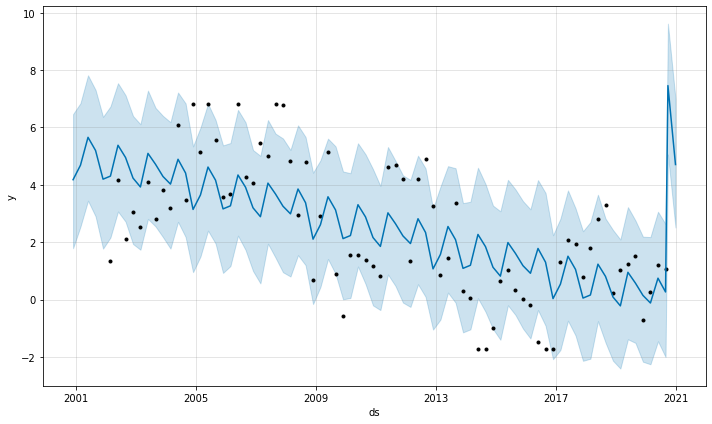

In [26]:
_ = m.plot(forecast)

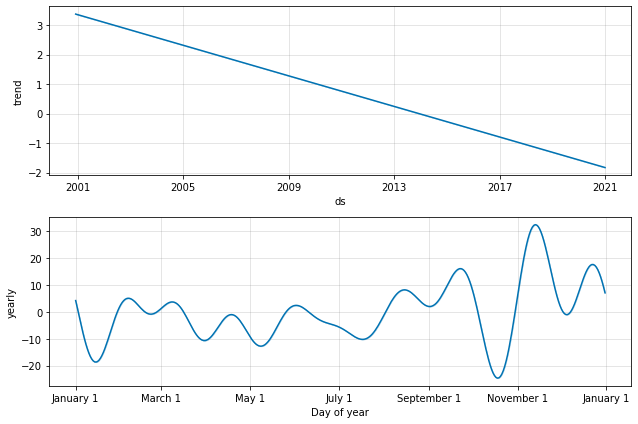

In [27]:
_ = m.plot_components(forecast)  # 时间序列的分量

In [23]:
import sys
sys.path.append("..")
from roeProcessTools import *

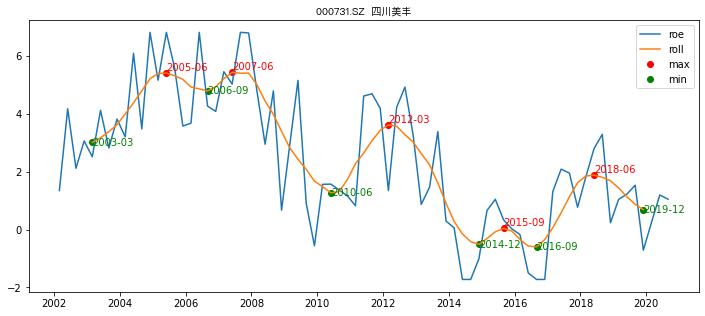

In [24]:
showOne("0", company)

In [28]:
company, y =  getCompanyByCode("002037", df)

In [29]:
company

,code,name,2000-12,2001-03,2001-06,2001-09,2001-12,2002-03,2002-06,2002-09,2002-12,2003-03,2003-06,2003-09,2003-12,2004-03,2004-06,2004-09,2004-12,2005-03,2005-06,2005-09,2005-12,2006-03,2006-06,2006-09,2006-12,2007-03,2007-06,2007-09,2007-12,2008-03,2008-06,2008-09,2008-12,2009-03,2009-06,2009-09,2009-12,2010-03,...,2010-12,2011-03,2011-06,2011-09,2011-12,2012-03,2012-06,2012-09,2012-12,2013-03,2013-06,2013-09,2013-12,2014-03,2014-06,2014-09,2014-12,2015-03,2015-06,2015-09,2015-12,2016-03,2016-06,2016-09,2016-12,2017-03,2017-06,2017-09,2017-12,2018-03,2018-06,2018-09,2018-12,2019-03,2019-06,2019-09,2019-12,2020-03,2020-06,2020-09
33,002037.SZ,保利联合,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.04527,NaN,8.04527,2.4984,1.851,0.5243,2.9157,2.7641,2.5038,0.6349,3.1945,2.3509,3.5041,0.9139,2.8136,2.2958,2.8459,-0.38406,2.0691,2.1529,5.1176,1.0358,3.7756,6.2626,3.8914,1.6137,...,6.0962,2.3337,8.04527,7.1989,8.04527,1.8673,5.6694,3.224,4.6039,1.2696,4.106,3.2738,3.6821,1.2915,4.3169,2.3251,4.033,1.2528,3.3813,-0.135,-0.38406,-0.38406,1.5173,0.7827,2.1082,0.3204,1.5312,1.2177,0.6741,0.2444,1.8901,1.4084,3.8131,-0.3744,2.4348,0.4153,1.9393,-0.38406,2.9037,1.9196


In [30]:
ds = pd.to_datetime(df.columns.values[2:]).date
testDf = pd.DataFrame({"ds":ds, "y":y})

In [31]:
m = Prophet()
m.fit(testDf)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
future = m.make_future_dataframe(periods=4)
future.tail()
forecast = m.predict(future)

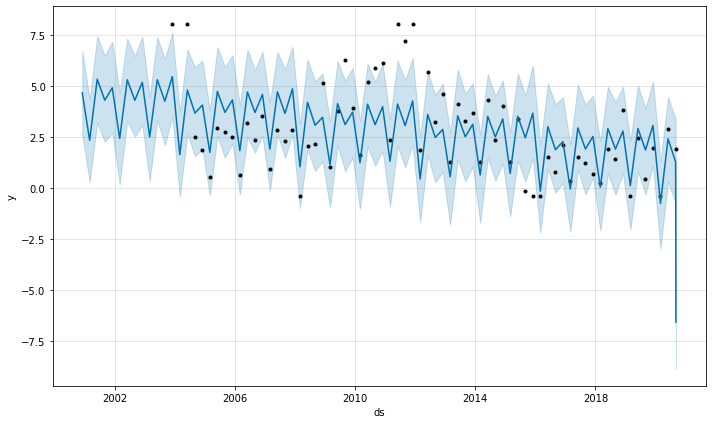

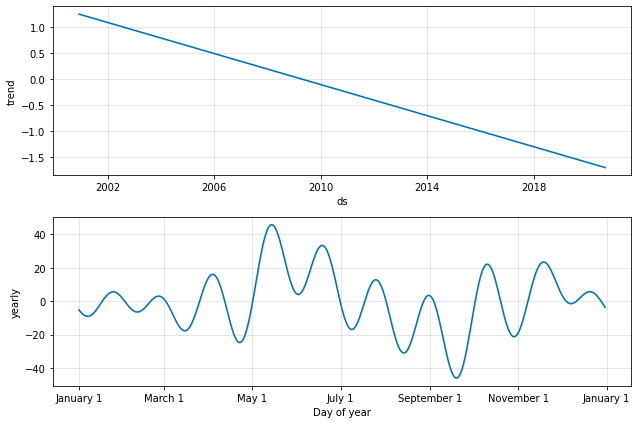

In [35]:
_ = m.plot(forecast)
_ = m.plot_components(forecast)  # 时间序列的分量